# Exploring relationships

In [1]:
# Import Visualization Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check matplotlib version
matplotlib.__version__

'3.7.2'

In [3]:
# This option ensures the charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [2]:
# Create a path
path = r'C:\Users\Asus-Pc\Desktop\CareerFoundry\Data Analytics Immersion\6. Advanced Analytics & Dashboard Design\Task 6.1 - Sourcing Open Data\UFC fight historical data 1993-2021'

In [3]:
# Import preprocessed_data.csv
df_ufc = pd.read_csv(os.path.join(path, 'preprocessed_data.csv'), index_col = False)

In [4]:
# Check dataset's types
df_ufc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Data columns (total 160 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    Winner                           object 
 1    title_bout                       bool   
 2    B_avg_KD                         float64
 3    B_avg_opp_KD                     float64
 4    B_avg_SIG_STR_pct                float64
 5    B_avg_opp_SIG_STR_pct            float64
 6    B_avg_TD_pct                     float64
 7    B_avg_opp_TD_pct                 float64
 8    B_avg_SUB_ATT                    float64
 9    B_avg_opp_SUB_ATT                float64
 10   B_avg_REV                        float64
 11   B_avg_opp_REV                    float64
 12   B_avg_SIG_STR_att                float64
 13   B_avg_SIG_STR_landed             float64
 14   B_avg_opp_SIG_STR_att            float64
 15   B_avg_opp_SIG_STR_landed         float64
 16   B_avg_TOTAL_STR_att              float64

2.
Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis

The questions that I could answer using part of my dataset are:

a. Is there a correlation between age of the fighter and wins? In other words, is there a certain age at which fighters are more likely to win?

b. Is there a stance that leads to victory more frequently than others?

c. A fighter is more likely to win if he/she lands more takedowns or if he/she knocks down the opponent more frequently? In other words, which type of fighter is more likely to win? A grappler or a striker? 

d. Is there any part of the body to be hit that leads more frequently to victory? For instance, the winners hit more frequently the body, the legs or the head or it doesn’t matter?

Premise: Generally speaking, the red corner is assigned to the side which is believed to be more favored to win. For instance, in title bouts, the defending champion is always in the red corner. So the difference between the two corners isn't only a matter of color, but also of chances to win, hence I decided to run my analysis on the two corners separately to see if there are some differences between the two.

3.
Create a correlation matrix heatmap (colored). 
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

Correlation matrix and heatmap for blue corner:

In [8]:
# Create dataset to answer all questions for blue corner
df_questions_blue = df_ufc[['B_age', 'B_wins', 'B_losses','B_Stance_Orthodox', 'B_Stance_Sideways', 'B_Stance_Southpaw', 'B_Stance_Switch', 'B_avg_KD', 'B_avg_TD_pct', 'B_avg_HEAD_landed', 'B_avg_BODY_landed', 'B_avg_LEG_landed']]

In [9]:
# Create a correlation matrix using pandas for blue corner
df_questions_blue.corr()

B_age    B_wins  B_losses  B_Stance_Orthodox  \
B_age              1.000000  0.359213  0.401478          -0.004205   
B_wins             0.359213  1.000000  0.732012          -0.064655   
B_losses           0.401478  0.732012  1.000000          -0.014783   
B_Stance_Orthodox -0.004205 -0.064655 -0.014783           1.000000   
B_Stance_Sideways  0.012744 -0.012455 -0.017348          -0.046964   
B_Stance_Southpaw  0.017196  0.078048  0.039028          -0.882356   
B_Stance_Switch   -0.031488 -0.013788 -0.040014          -0.367234   
B_avg_KD           0.051107  0.240330  0.091225          -0.042550   
B_avg_TD_pct      -0.068473  0.034665 -0.071327          -0.014525   
B_avg_HEAD_landed  0.011132  0.209501  0.081148           0.019807   
B_avg_BODY_landed  0.041873  0.154048  0.099590           0.002838   
B_avg_LEG_landed   0.065433  0.153202  0.104505           0.032101   

                   B_Stance_Sideways  B_Stance_Southpaw  B_Stance_Switch  \
B_age                       0.012744           0.017196        -0.031488   
B_wins                     -0.012455           0.078048        -0.013788   
B_losses                   -0.017348           0.039028        -0.040014   
B_Stance_Orthodox          -0.046964          -0.882356        -0.367234   
B_Stance_Sideways           1.000000          -0.012742        -0.005303   
B_Stance_Southpaw          -0.012742           1.000000        -0.099636   
B_Stance_Switch            -0.005303          -0.099636         1.000000   
B_avg_KD                    0.000118           0.032446         0.026206   
B_avg_TD_pct               -0.017117           0.031870        -0.025990   
B_avg_HEAD_landed          -0.010644          -0.009961        -0.019720   
B_avg_BODY_landed          -0.018135           0.008429        -0.019970   
B_avg_LEG_landed           -0.004317          -0.042878         0.015309   

                   B_avg_KD  B_avg_TD_pct  B_avg_HEAD_landed  \
B_age              0.051107     -0.068473           0.011132   
B_wins             0.240330      0.034665           0.209501   
B_losses           0.091225     -0.071327           0.081148   
B_Stance_Orthodox -0.042550     -0.014525           0.019807   
B_Stance_Sideways  0.000118     -0.017117          -0.010644   
B_Stance_Southpaw  0.032446      0.031870          -0.009961   
B_Stance_Switch    0.026206     -0.025990          -0.019720   
B_avg_KD           1.000000     -0.080119           0.112047   
B_avg_TD_pct      -0.080119      1.000000           0.063169   
B_avg_HEAD_landed  0.112047      0.063169           1.000000   
B_avg_BODY_landed  0.039951      0.028679           0.534863   
B_avg_LEG_landed   0.047575     -0.038812           0.373890   

                   B_avg_BODY_landed  B_avg_LEG_landed  
B_age                       0.041873          0.065433  
B_wins                      0.154048          0.153202  
B_losses                    0.099590          0.104505  
B_Stance_Orthodox           0.002838          0.032101  
B_Stance_Sideways          -0.018135         -0.004317  
B_Stance_Southpaw           0.008429         -0.042878  
B_Stance_Switch            -0.019970          0.015309  
B_avg_KD                    0.039951          0.047575  
B_avg_TD_pct                0.028679         -0.038812  
B_avg_HEAD_landed           0.534863          0.373890  
B_avg_BODY_landed           1.000000          0.444302  
B_avg_LEG_landed            0.444302          1.000000

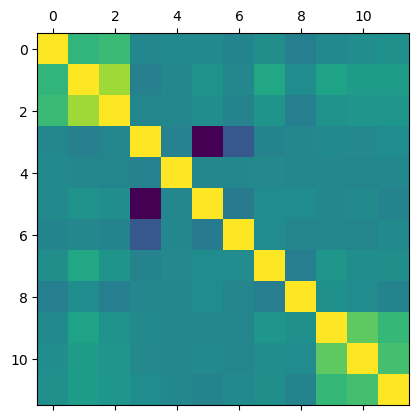

In [10]:
# Create a correlation heatmap using matplotlib for blue corner

plt.matshow(df_questions_blue.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Blue')

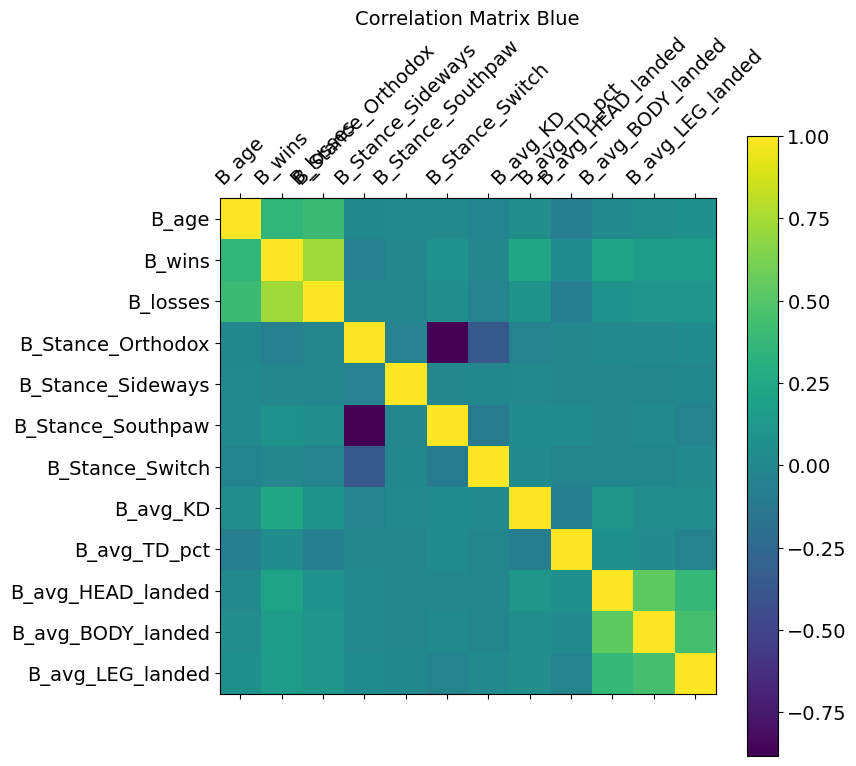

In [11]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_questions_blue.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_questions_blue.shape[1]), df_questions_blue.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_questions_blue.shape[1]), df_questions_blue.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix Blue', fontsize=14) # add title

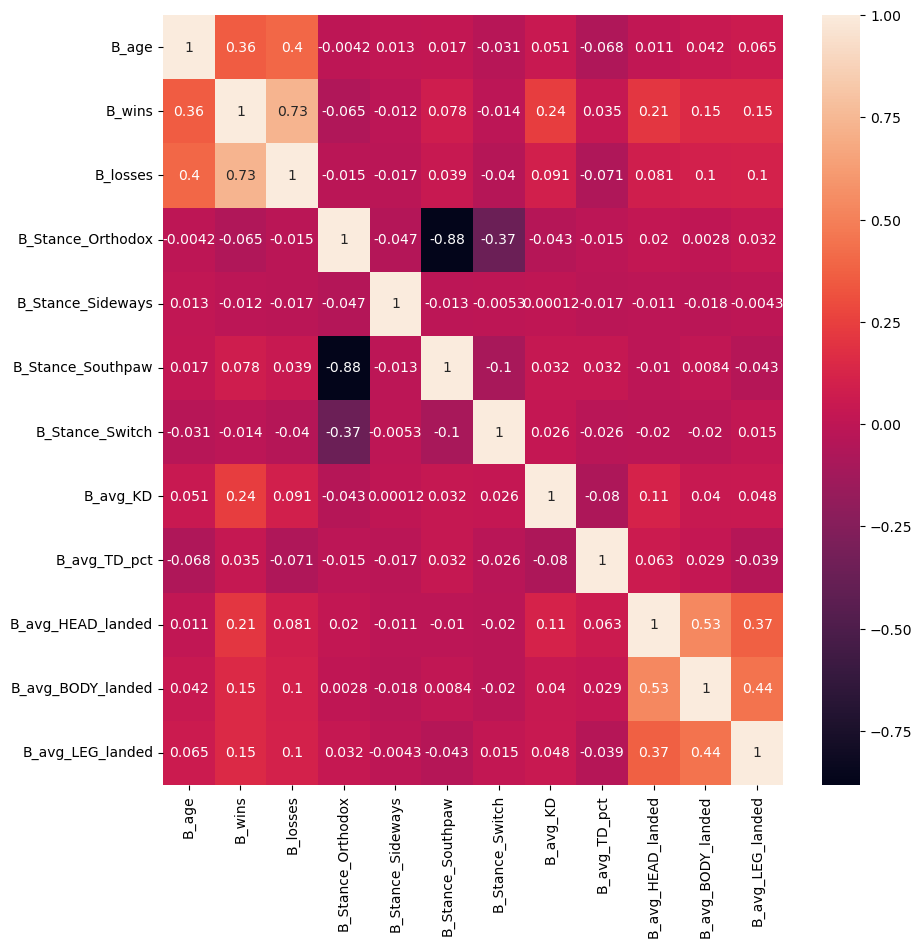

In [12]:
# Create a subplot with matplotlib for blue corner
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_B = sns.heatmap(df_questions_blue.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Regarding fighters in the blue corner, a moderate positive correlation(0.36) between wins and age of the fighter can be observed. This could make us think that, as fighters get older, the more likely they win fights. This hypothesis might be discarded, though, since the same holds true for age and losses(0.4 as correlation coefficient). These two almost identical correlation coefficients might be imputed to the fact that the fighters age range is on the older side rather than younger (for instance, the majority of fighters are aged over 30), so these correlation might not imply that as the age of a fighter increases, so his/her chances to win increases as well.

The correlation coefficients between both wins and losses and different types of stances are extremely small, leading us to believe that there isn't a specific stance that more frequently leads to victory (or defeat).

A weak relationship (0.24 as coefficient) can be observed between wins and knockdowns, while it is vanishingly small for the correlation between wins and takedowns landed. This could mean that, although not significantly, a high number of knockdowns leads to victory more often than a high number of takedowns landed. This hypothesis is coherent with the fact tat there's little to no correlation between losses and both number of knockdowns and takedowns landed.

The correlation coefficient between wins and shots to the head, body and legs are comparable, leading us to believe that there isn't any part of the body to be hit that leads more frequently to victory compared to others.

Correlation matrix and heatmap for red corner:

In [13]:
# Create dataset to answer all questions for red corner
df_questions_red = df_ufc[['R_age', 'R_wins', 'R_losses','R_Stance_Orthodox', 'R_Stance_Sideways', 'R_Stance_Southpaw', 'R_Stance_Switch', 'R_avg_KD', 'R_avg_TD_pct', 'R_avg_HEAD_landed', 'R_avg_BODY_landed', 'R_avg_LEG_landed']]

In [14]:
# Create a correlation matrix using pandas for red corner
df_questions_red.corr()

R_age    R_wins  R_losses  R_Stance_Orthodox  \
R_age              1.000000  0.440413  0.475949          -0.020892   
R_wins             0.440413  1.000000  0.706764          -0.081737   
R_losses           0.475949  0.706764  1.000000          -0.027701   
R_Stance_Orthodox -0.020892 -0.081737 -0.027701           1.000000   
R_Stance_Sideways -0.002565 -0.015559 -0.016844          -0.032680   
R_Stance_Southpaw  0.039686  0.103335  0.062010          -0.901370   
R_Stance_Switch   -0.053638 -0.034171 -0.064900          -0.328097   
R_avg_KD           0.020595  0.125545 -0.007460          -0.036270   
R_avg_TD_pct      -0.105833 -0.018713 -0.122275          -0.001592   
R_avg_HEAD_landed  0.016256  0.199958  0.033974           0.034781   
R_avg_BODY_landed  0.048996  0.183140  0.090788           0.017599   
R_avg_LEG_landed   0.065402  0.172085  0.096175           0.063541   

                   R_Stance_Sideways  R_Stance_Southpaw  R_Stance_Switch  \
R_age                      -0.002565           0.039686        -0.053638   
R_wins                     -0.015559           0.103335        -0.034171   
R_losses                   -0.016844           0.062010        -0.064900   
R_Stance_Orthodox          -0.032680          -0.901370        -0.328097   
R_Stance_Sideways           1.000000          -0.009350        -0.003403   
R_Stance_Southpaw          -0.009350           1.000000        -0.093870   
R_Stance_Switch            -0.003403          -0.093870         1.000000   
R_avg_KD                    0.015969           0.021437         0.034512   
R_avg_TD_pct               -0.012714          -0.004557         0.024142   
R_avg_HEAD_landed           0.002535          -0.038874         0.007761   
R_avg_BODY_landed          -0.012995          -0.019515         0.005714   
R_avg_LEG_landed           -0.003129          -0.056315        -0.024727   

                   R_avg_KD  R_avg_TD_pct  R_avg_HEAD_landed  \
R_age              0.020595     -0.105833           0.016256   
R_wins             0.125545     -0.018713           0.199958   
R_losses          -0.007460     -0.122275           0.033974   
R_Stance_Orthodox -0.036270     -0.001592           0.034781   
R_Stance_Sideways  0.015969     -0.012714           0.002535   
R_Stance_Southpaw  0.021437     -0.004557          -0.038874   
R_Stance_Switch    0.034512      0.024142           0.007761   
R_avg_KD           1.000000     -0.130912           0.078193   
R_avg_TD_pct      -0.130912      1.000000           0.041639   
R_avg_HEAD_landed  0.078193      0.041639           1.000000   
R_avg_BODY_landed  0.000103     -0.026899           0.555268   
R_avg_LEG_landed   0.013133     -0.086476           0.356286   

                   R_avg_BODY_landed  R_avg_LEG_landed  
R_age                       0.048996          0.065402  
R_wins                      0.183140          0.172085  
R_losses                    0.090788          0.096175  
R_Stance_Orthodox           0.017599          0.063541  
R_Stance_Sideways          -0.012995         -0.003129  
R_Stance_Southpaw          -0.019515         -0.056315  
R_Stance_Switch             0.005714         -0.024727  
R_avg_KD                    0.000103          0.013133  
R_avg_TD_pct               -0.026899         -0.086476  
R_avg_HEAD_landed           0.555268          0.356286  
R_avg_BODY_landed           1.000000          0.449314  
R_avg_LEG_landed            0.449314          1.000000

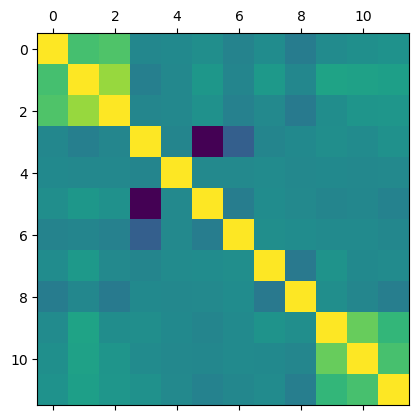

In [15]:
# Create a correlation heatmap using matplotlib for red corner

plt.matshow(df_questions_red.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Red')

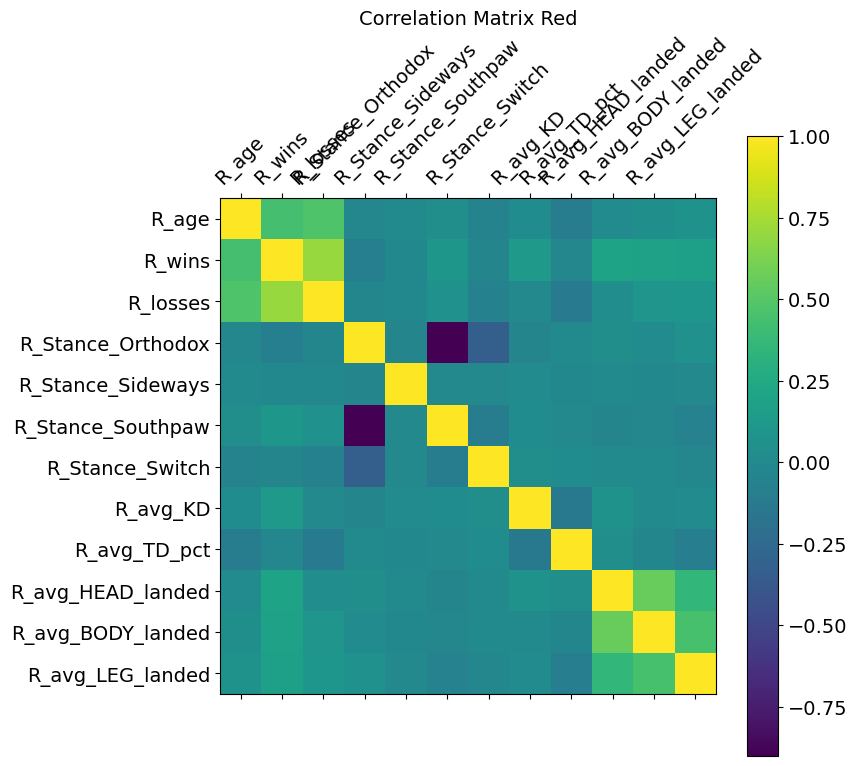

In [16]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_questions_red.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_questions_red.shape[1]), df_questions_red.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_questions_red.shape[1]), df_questions_red.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix Red', fontsize=14) # add title

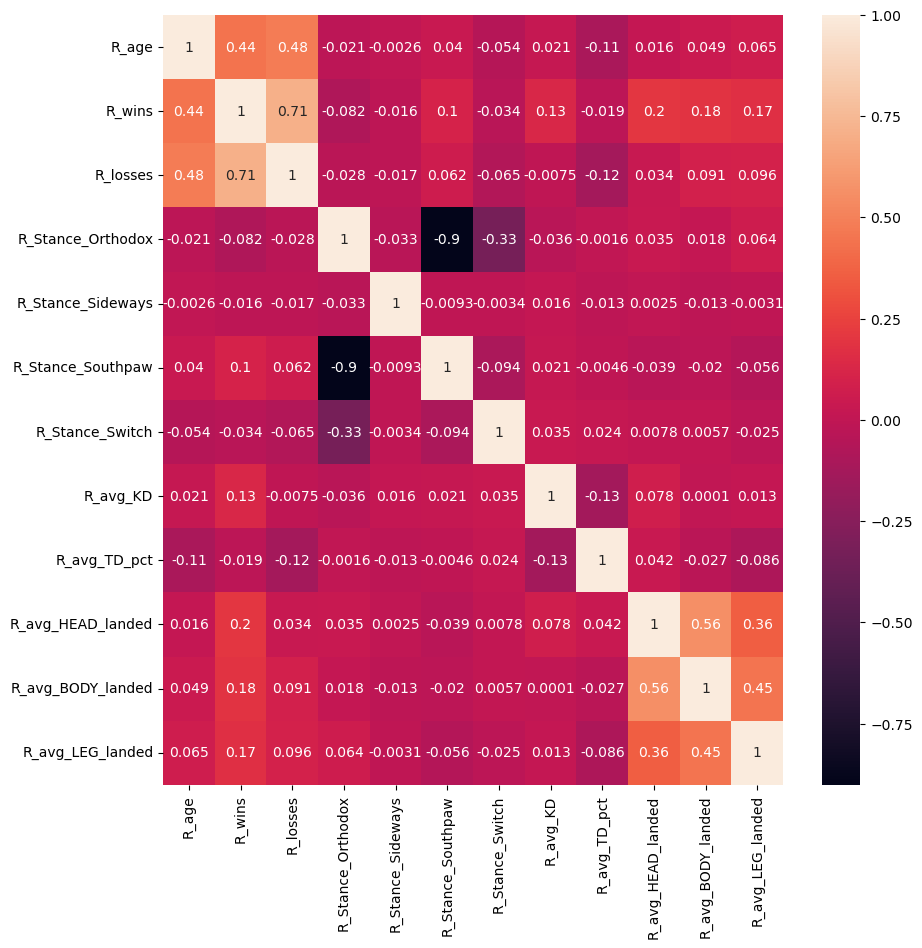

In [17]:
# Create a subplot with matplotlib for red corner
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_B = sns.heatmap(df_questions_red.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The results for fighters in the red corner are almost the same as the fighters in the blue one, except for a single difference: there is a positive correlation between age and both wins and losses, no correlation between wins/losses and stances and no significant difference in correlation coefficient between wins and different part of the body hit. The main difference between blue and red corner is that, for the latter, the positive correlation between knockdowns and wins is much smaller, while there's a weak but not insignificant, negative correlation between losses and takedowns landed. This could mean that, for fighters in the red corner, there is less tendency of knockdowns over takedowns leading to victory, compared to fighters in the blue.

4.
Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.

Scatterplots for blue corner:

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


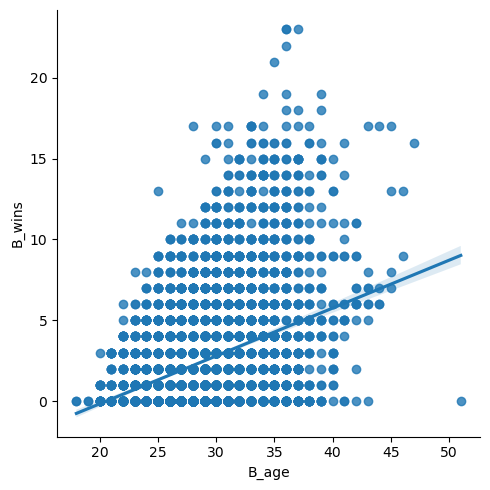

In [4]:
# Create a scatterplot for the "age" and "wins" columns in seaborn (for blue corner)

sns.lmplot(x = 'B_age', y = 'B_wins', data = df_ufc)

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


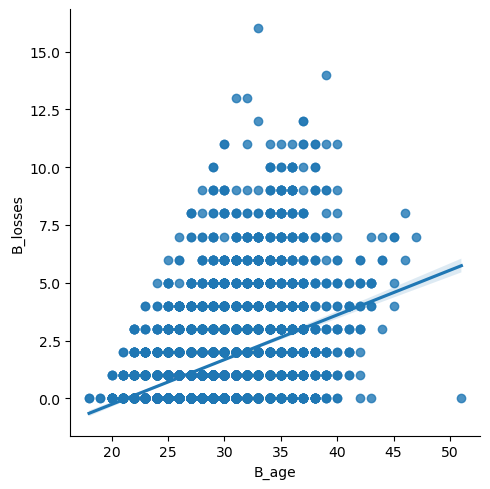

In [5]:
# Create a scatterplot for the "age" and "losses" columns in seaborn (for blue corner)

sns.lmplot(x = 'B_age', y = 'B_losses', data = df_ufc)

Scatterplots for red corner:

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


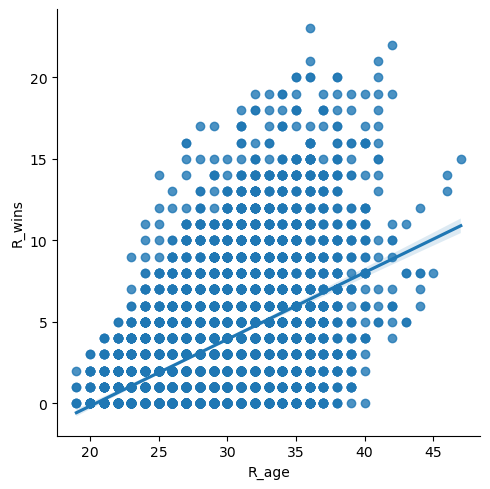

In [6]:
# Create a scatterplot for the "age" and "wins" columns in seaborn (for red corner)

sns.lmplot(x = 'R_age', y = 'R_wins', data = df_ufc)

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


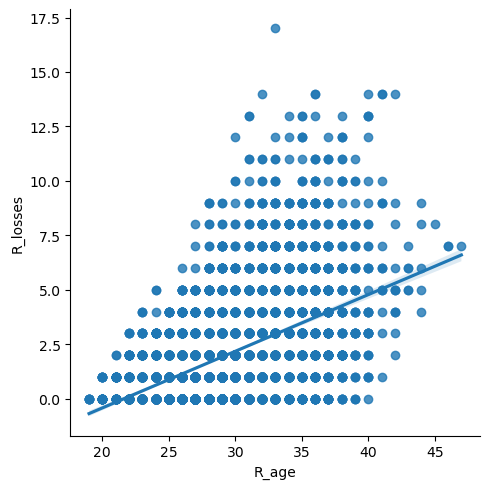

In [7]:
# Create a scatterplot for the "age" and "losses" columns in seaborn (for red corner)

sns.lmplot(x = 'R_age', y = 'R_losses', data = df_ufc)

For both blue and red corners, the results are similar: there is a positive correlation between age and both wins and losses, although there's a huge variability (since many points are away from the line), proving that age isn't a relevant factor for athletes to win or lose fights. It can be noticeable that, for both corners, the vast majority of athletes fight between an age of 25 to 35. Before 20 and after 40, there are only a few fighters. 

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


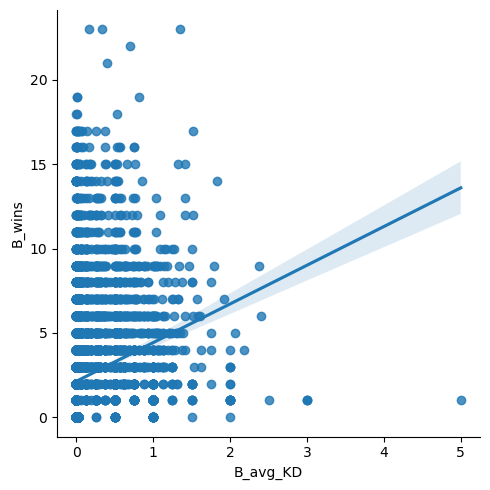

In [10]:
# Create a scatterplot for the "wins" and "average number of knockdowns" columns in seaborn (for blue corner)

sns.lmplot(x = 'B_avg_KD', y = 'B_wins', data = df_ufc)

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


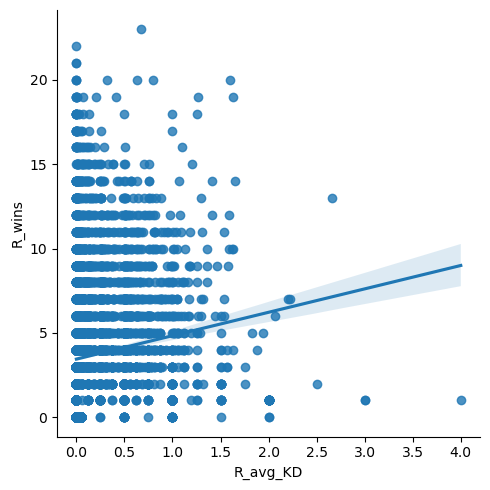

In [16]:
# Create a scatterplot for the "wins" and "average number of knockdowns" columns in seaborn (for red corner)

sns.lmplot(x = 'R_avg_KD', y = 'R_wins', data = df_ufc)

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


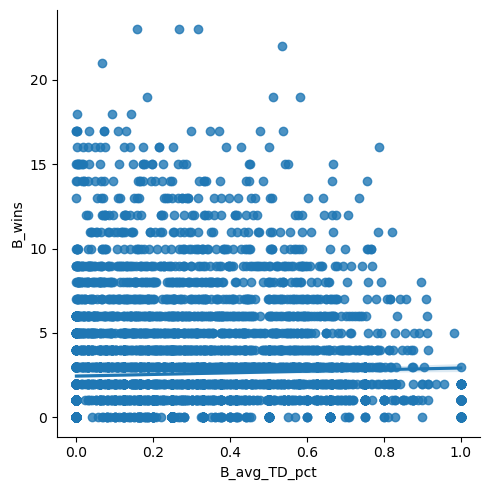

In [17]:
# Create a scatterplot for the "wins" and "average takedowns percentage" columns in seaborn (for blue corner)

sns.lmplot(x = 'B_avg_TD_pct', y = 'B_wins', data = df_ufc)

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


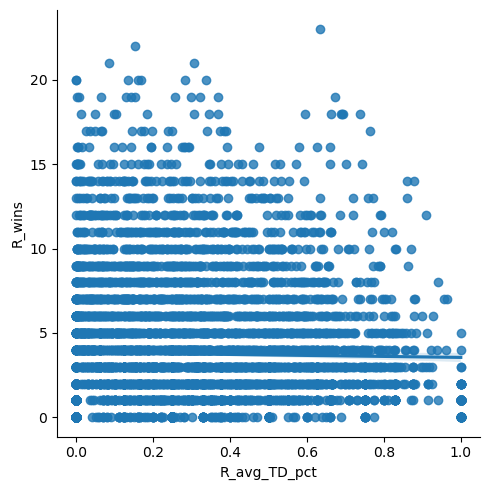

In [18]:
# Create a scatterplot for the "wins" and "average takedowns percentage" columns in seaborn (for red corner)

sns.lmplot(x = 'R_avg_TD_pct', y = 'R_wins', data = df_ufc)

These scatterplots confirm what we've found out before: there's a positive correlation between wins for both corners and average number of knockdowns (i.e., more knockdowns lead to higher probability of winning fights), and there's basically no correlation between wins and takedown percentage (i.e. scoring more takedowns doesn't affect the probability of winning fights).

5.
Create a pair plot of the entire data set. Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

In [7]:
# Keep only the variables we want to use in the pair plot for blue corner

sub_blue_2 = df_ufc[['B_avg_KD', 'B_avg_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_SUB_ATT', 'B_avg_TOTAL_STR_landed', 'B_avg_TD_landed', 'B_wins', 'B_losses']]

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

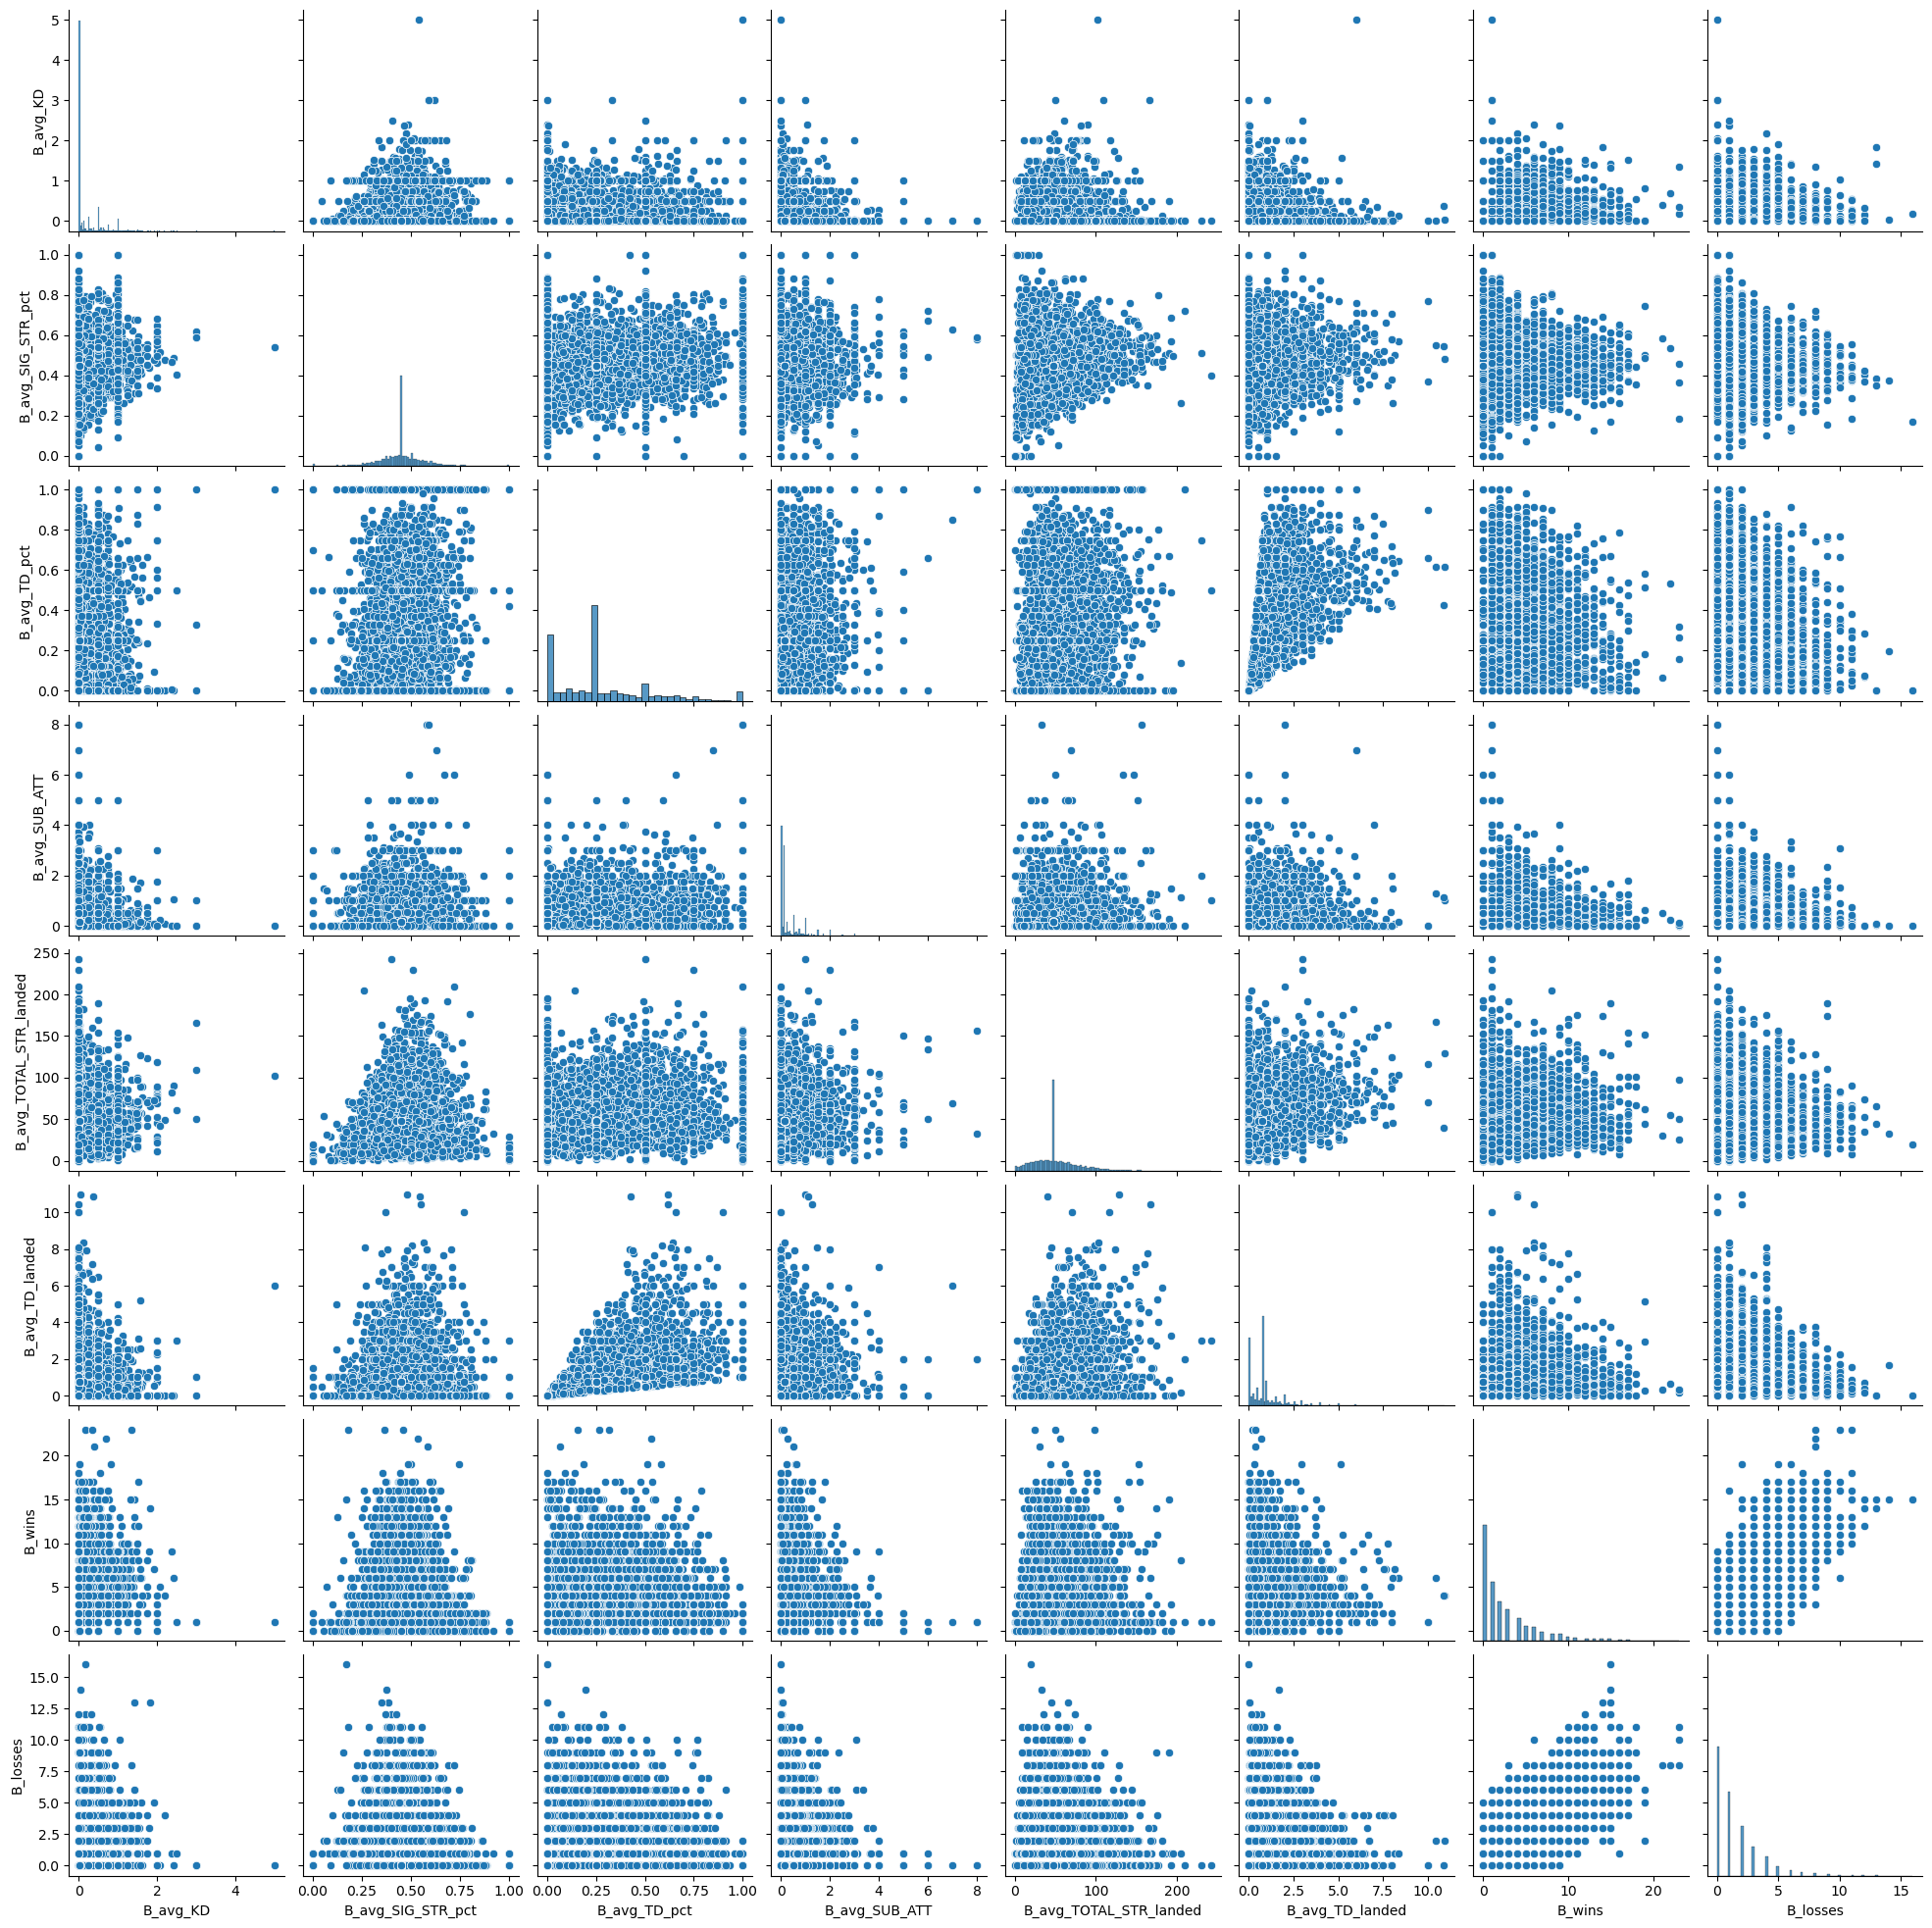

In [8]:
# Create a pair plot for the blue corner

g = sns.pairplot(sub_blue_2)

From these scatterplots, we can see that there isn't a close relationship between neither wins nor losses and takedown percentages. Apparently, fighters attempt 4 total submissions at the most, and generally speaking, these stats don't differ much from winners and losers. The only thing that seems to differenciate a little more between winners and losers seems to be the total number of strikes landed, which seems to be higher for fighters who end up winning the fights. 
This could be something that could be investigated upon in the future.

In [9]:
# Keep only the variables we want to use in the pair plot for red corner

sub_red = df_ufc[['R_avg_KD', 'R_avg_SIG_STR_pct', 'R_avg_TD_pct', 'R_avg_SUB_ATT', 'R_avg_TOTAL_STR_landed', 'R_avg_TD_landed', 'R_wins', 'R_losses']]

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

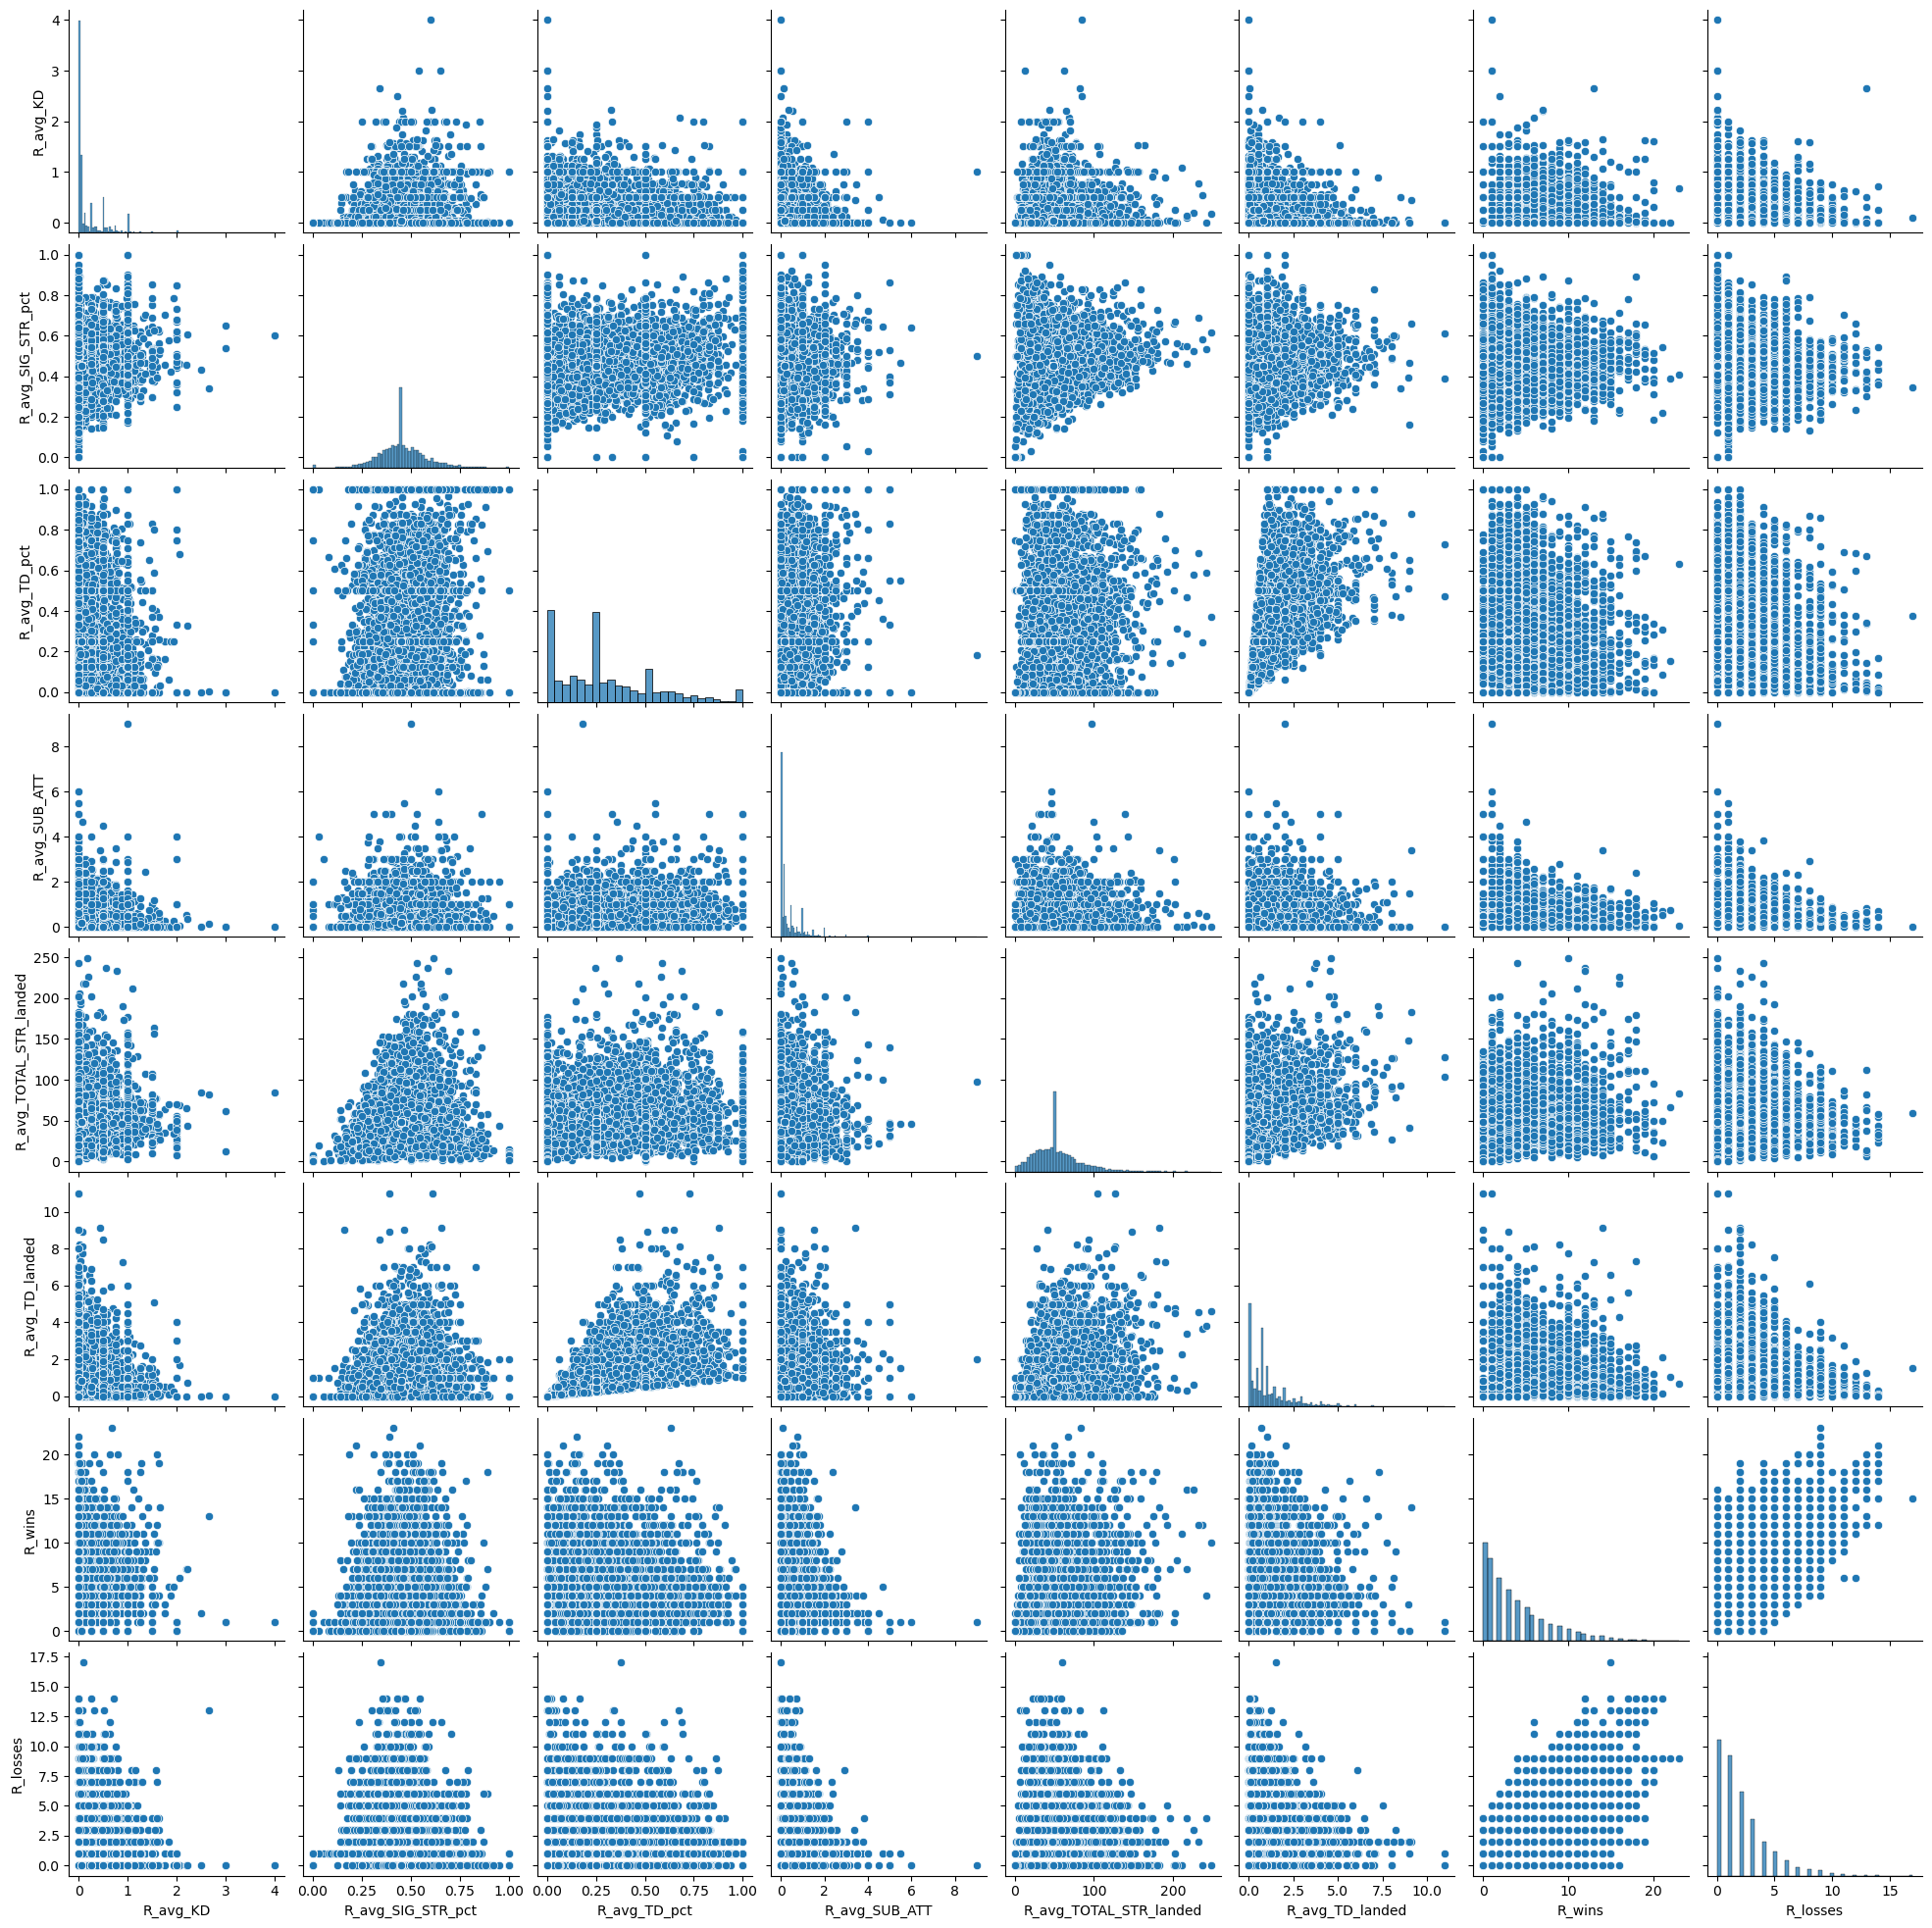

In [10]:
# Create a pair plot for red corner

g = sns.pairplot(sub_red)

The trend for the red corner looks similar to the blue one: the only thing worth noticing is that there's a higher number of total strikes and takedown landed for athletes ending up winning fights. Probably, one of the keys leading to victory is volume: the fighter with more volume is more likely to win the fight.

6.
Create a categorical plot and interpret the results.

Categorical plot for blue corner:

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='B_wins', ylabel='Count'>

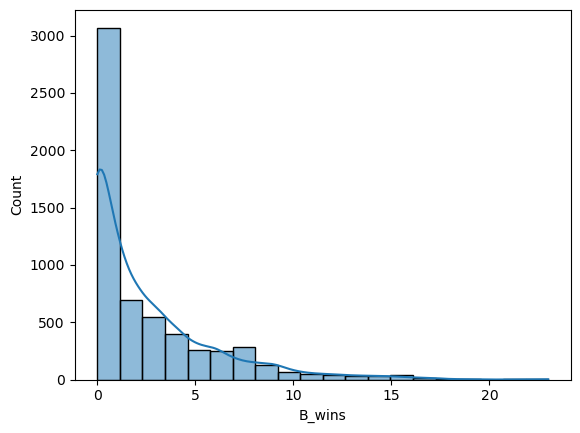

In [11]:
# Use a histogram to visualize the distribution of the wins for blue corner. 

sns.histplot(df_ufc['B_wins'], bins = 20, kde = True)

In [15]:
# Create categories
df_ufc.loc[df_ufc['B_wins'] < 5, 'wins category'] = 'Few victories'

In [17]:
df_ufc.loc[(df_ufc['B_wins'] >= 5) & (df_ufc['B_wins'] < 12), 'wins category'] = 'Average n of victories'

In [18]:
df_ufc.loc[df_ufc['B_wins'] >= 12, 'wins category'] = 'Many victories'

In [19]:
# Check result
df_ufc['wins category'].value_counts(dropna = False)

wins category
Few victories             4706
Average n of victories    1028
Many victories             168
Name: count, dtype: int64

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


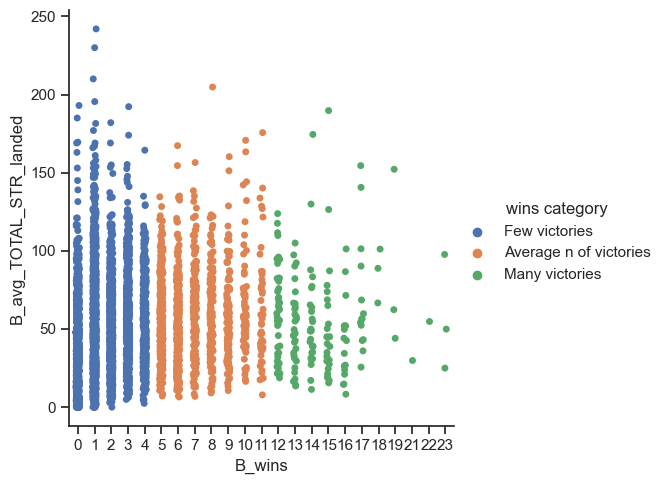

In [22]:
# Create a categorical plot in seaborn using the wins categories for blue corner created above

sns.set(style="ticks")
g = sns.catplot(x="B_wins", y="B_avg_TOTAL_STR_landed", hue="wins category", data=df_ufc)

This result is quite surprising to me: in fact, it seems that fighters that gain more wins don't have an higher number of total strikes landed as hypotesized before. On the contrary, it seems to be quite the opposite. Probably this is due to the fact that more experienced fighters pick up their shots better than their less experienced colleagues; if this is true, it means that volume isn't a relevant factor that leads to winning fights.

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='B_losses', ylabel='Count'>

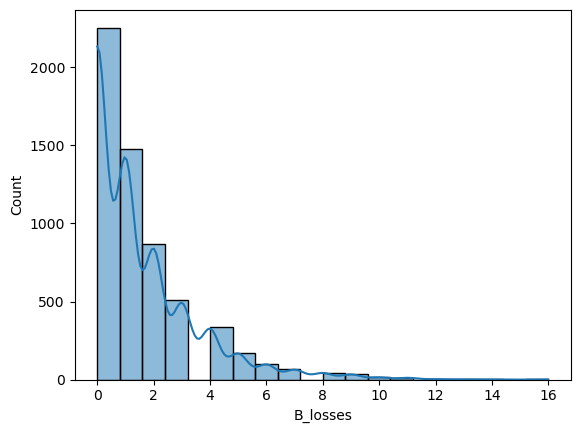

In [12]:
# Use a histogram to visualize the distribution of the losses for blue corner. 

sns.histplot(df_ufc['B_losses'], bins = 20, kde = True)

In [10]:
# Create categories
df_ufc.loc[df_ufc['B_losses'] < 3, 'losses category'] = 'Few losses'

In [11]:
df_ufc.loc[(df_ufc['B_losses'] >= 3) & (df_ufc['B_losses'] < 8), 'losses category'] = 'Average n of losses'

In [12]:
df_ufc.loc[df_ufc['B_losses'] >= 8, 'losses category'] = 'Many losses'

In [13]:
# Check result
df_ufc['losses category'].value_counts(dropna = False)

losses category
Few losses             4601
Average n of losses    1188
Many losses             113
Name: count, dtype: int64

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


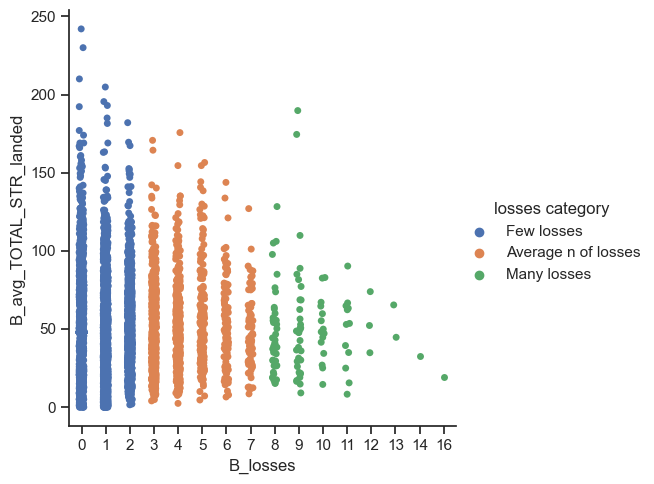

In [14]:
# Create a categorical plot in seaborn using the losses categories for blue corner created above

sns.set(style="ticks")
g = sns.catplot(x="B_losses", y="B_avg_TOTAL_STR_landed", hue="losses category", data=df_ufc)

The tendency of placing only a few shots is the same for fighters ending up losing. Hence, there isn't a big difference in shots landed for winners and losers.

Categorical plot for red corner:

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='R_wins', ylabel='Count'>

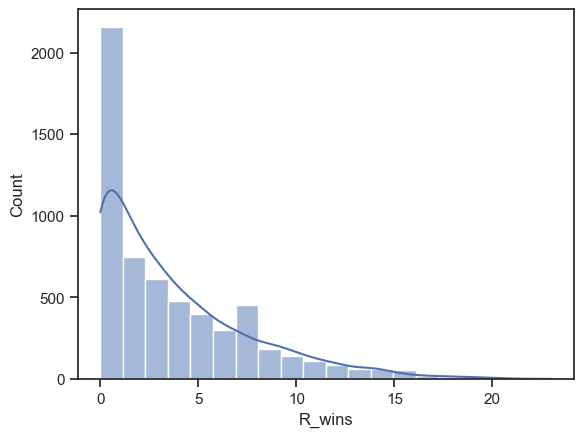

In [15]:
# Use a histogram to visualize the distribution of the wins for red corner. 

sns.histplot(df_ufc['R_wins'], bins = 20, kde = True)

In [16]:
# Create categories
df_ufc.loc[df_ufc['R_wins'] < 5, 'wins category'] = 'Few victories'

In [17]:
df_ufc.loc[(df_ufc['R_wins'] >= 5) & (df_ufc['R_wins'] < 12), 'wins category'] = 'Average n of victories'

In [18]:
df_ufc.loc[df_ufc['R_wins'] >= 12, 'wins category'] = 'Many victories'

In [20]:
# Check result
df_ufc['wins category'].value_counts(dropna = False)

wins category
Few victories             3998
Average n of victories    1588
Many victories             316
Name: count, dtype: int64

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


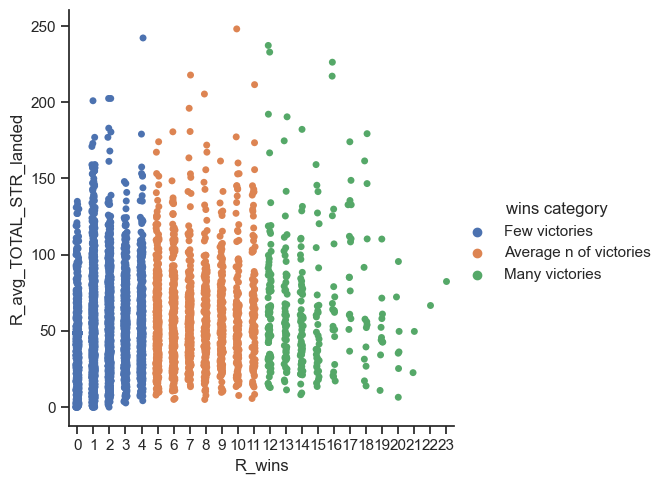

In [21]:
# Create a categorical plot in seaborn using the wins categories for red corner created above

sns.set(style="ticks")
g = sns.catplot(x="R_wins", y="R_avg_TOTAL_STR_landed", hue="wins category", data=df_ufc)

The distribution looks similar to the one for blue corner, although it seems that, even if it's still true that fighters getting more wins place less shots, the difference in this regard between fighters getting a few wins and those who win often, isn't very marked as for the blue corner.

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='R_losses', ylabel='Count'>

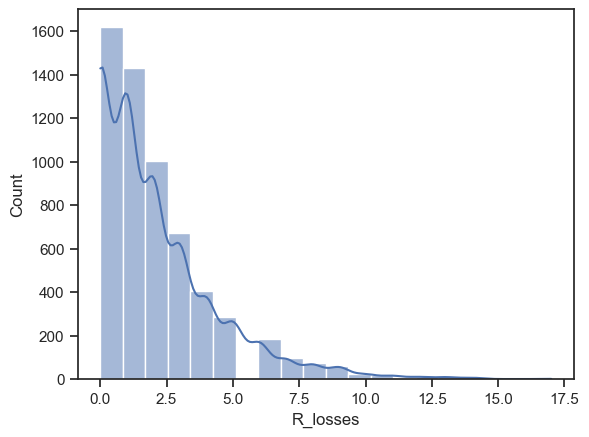

In [22]:
# Use a histogram to visualize the distribution of the losses for blue corner. 

sns.histplot(df_ufc['R_losses'], bins = 20, kde = True)

In [23]:
# Create categories
df_ufc.loc[df_ufc['R_losses'] < 3, 'losses category'] = 'Few losses'

In [24]:
df_ufc.loc[(df_ufc['R_losses'] >= 3) & (df_ufc['R_losses'] < 8), 'losses category'] = 'Average n of losses'

In [25]:
df_ufc.loc[df_ufc['R_losses'] >= 8, 'losses category'] = 'Many losses'

In [26]:
# Check result
df_ufc['losses category'].value_counts(dropna = False)

losses category
Few losses             4055
Average n of losses    1642
Many losses             205
Name: count, dtype: int64

C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus-Pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


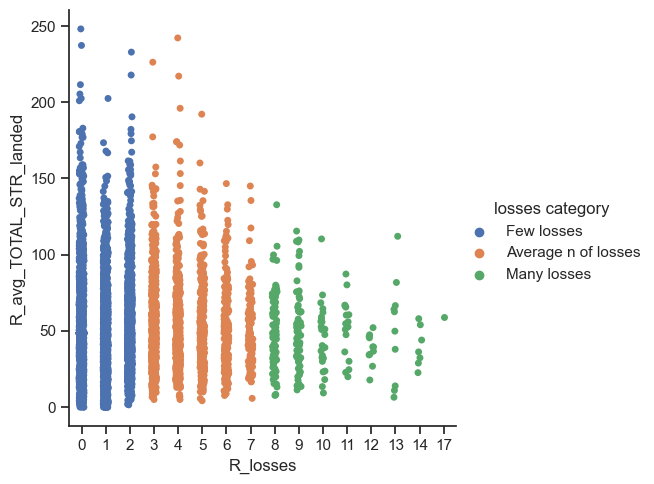

In [27]:
# Create a categorical plot in seaborn using the losses categories for red corner created above

sns.set(style="ticks")
g = sns.catplot(x="R_losses", y="R_avg_TOTAL_STR_landed", hue="losses category", data=df_ufc)

The tendency for the red corner seems to be that fighters who win more fights place almost as many shots as those who win a few. Fighters in the red corner losing a big number of fights usually place less shots than those who lose less fights. This difference between blue and red corner might be explored in the future. 

7.
Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

The questions asked at the beginning were:

a. Is there a correlation between age of the fighter and wins? In other words, is there a certain age at which fighters are more likely to win?

b. Is there a stance that leads to victory more frequently than others?

c. A fighter is more likely to win if he/she lands more takedowns or if he/she knocks down the opponent more frequently? In other words, which type of fighter is more likely to win? A grappler or a striker?

d. Is there any part of the body to be hit that leads more frequently to victory? For instance, the winners hit more frequently the body, the legs or the head or it doesn’t matter?

The answers are: 

a. No, there isn't a particular correlation between age of the fighter and wins for both corners. In other words, the age of a fighter doesn't impact much the outcome of a fight.

b. No, for both corners there isn't a specific stance that more frequently leads to victory (or defeat).

c. There is a small positive correlation betweeen knockdowns and wins, while there isn't any correlation between takedowns landed and wins. This means that knockdowns lead to victory more than takedowns.

d. The correlation indexes between strikes to the head, body and legs to wins are almost the same for both corners. This means that there isn't a part of the body in particular to be hit that leads to victory more than the other parts. 

8.
Define any hypotheses that you can at this point. You’ll be testing these later on.

I found out that fighters in the blue corner gaining more wins don't have an higher number of total strikes landed but it seems to be quite the opposite. This isn't exactly the same for fighters in the red corner: in fact, fighters who win more fights place almost as many shots as those who win a few. 

The hypotheses I can think about now are: 

a. For fighters in the red corner, volume is more relevant than for fighters in the blue one. 

b. For fighters in the red corner, there is less tendency of knockdowns over takedowns leading to victory, compared to fighters in the blue.